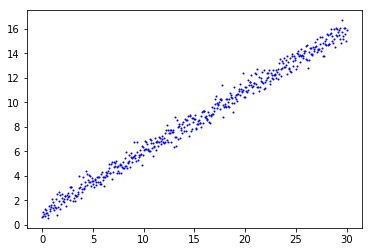

In [1]:
#Генерирую датасет и визуализирую выборку
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
epsilons = np.random.normal(0, math.sqrt(0.2), 500)
x = np.linspace(0, 30, 500)
real = np.array([0.5 * x[i] + 1 + epsilons[i] for i in range(0, 500)])
plt.scatter(x, real, c = 'blue', alpha = 1, s = 1)
plt.figure(figsize = (18, 8))

In [2]:
#Восстанавливаем зависимость y(x)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mse(data):
    predicted = [data[0] * i + data[1] for i in x]
    return mean_squared_error(predicted, real)
    
def mae(data):
    predicted = [data[0] * i + data[1] for i in x]
    return mean_absolute_error(predicted, real)

from scipy.optimize import minimize
answer_mse = minimize(mse,[0,0])
answer_mae = minimize(mae,[0,0])

print answer_mse.x
print answer_mae.x

[ 0.49740823  1.03601243]
[ 0.49985314  1.01349308]


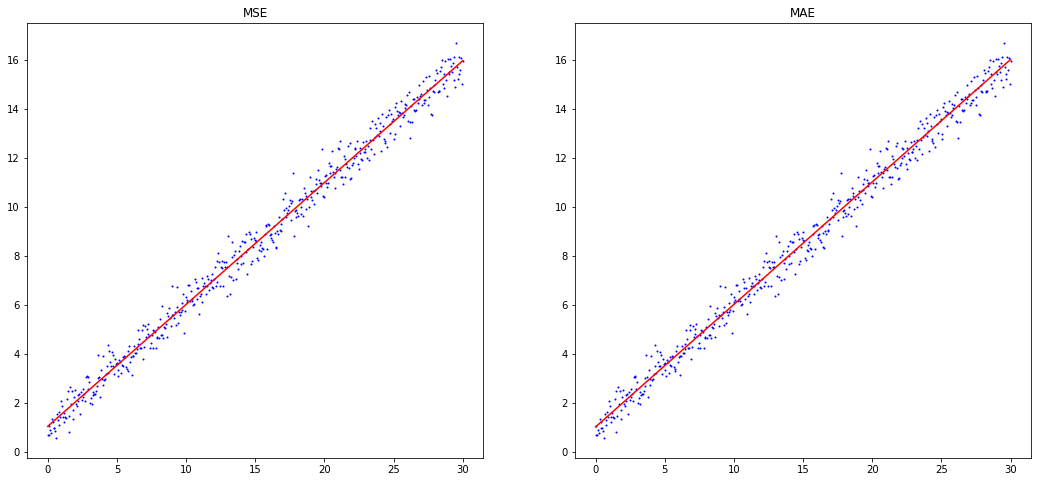

In [3]:
#Cтроим график прямой, полученной методом MSE
plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
plt.scatter(x, real, c = 'blue', alpha = 1, s = 1)
plt.plot(x, [i * answer_mse.x[0] + answer_mse.x[1] for i in x], 'red')
plt.title('MSE')

#Построим также просто для сравненя, график прямой, полученной методом MAE
plt.subplot(1,2,2)
plt.scatter(x, real, c = 'blue', alpha = 1, s = 1)
plt.plot(x, [i * answer_mae.x[0] + answer_mae.x[1] for i in x], 'red')
plt.title('MAE')

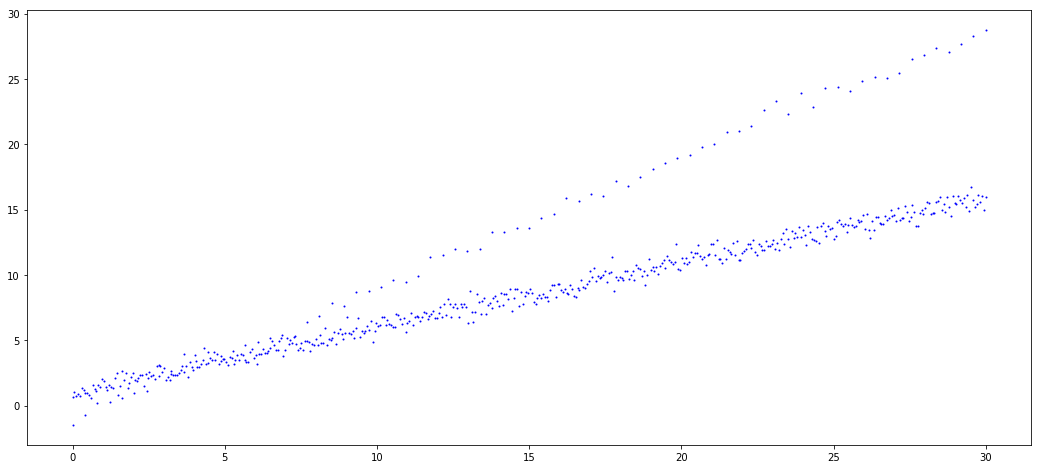

In [4]:
#Добавляем выбросы и визуализируем измененный датасет
x_add = np.linspace(0, 30, 75)
epsilons_add = np.random.normal(0, math.sqrt(0.2), 75)
real_add = np.array([x_add[i] - 1 + epsilons_add[i] for i in range(0, 75)])
x = np.append(x, x_add)
real = np.append(real, real_add)
plt.figure(figsize = (18, 8))
plt.scatter(x, real, c = 'blue', alpha = 1, s = 1)

In [5]:
#Решаем задачу нахождения коэффициентов для измененного датасета
answer_mse = minimize(mse,[0,0])
answer_mae = minimize(mae,[0,0])
print answer_mse.x
print answer_mae.x

[ 0.56420681  0.74795032]
[ 0.50455984  0.99283788]


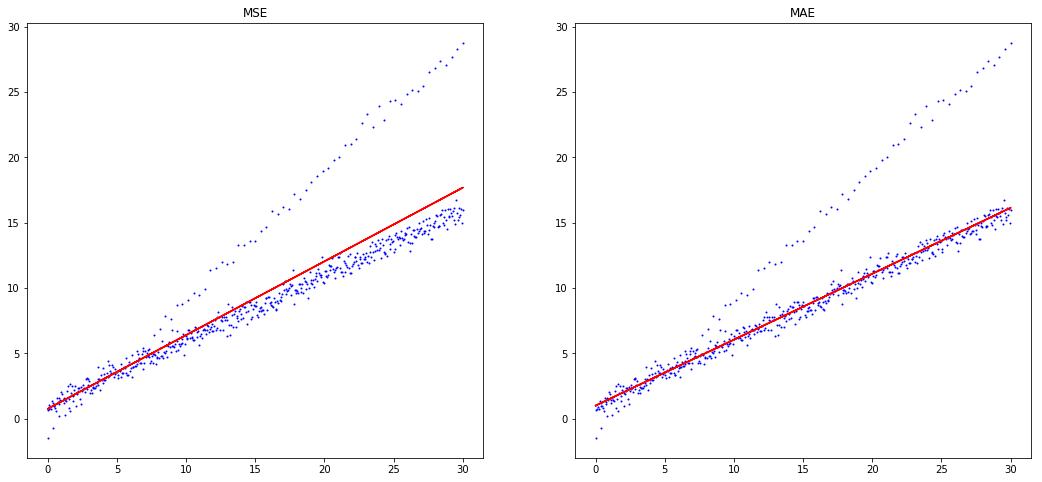

In [7]:
#визуализируем полученные прямые
plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
plt.scatter(x, real, c = 'blue', alpha = 1, s = 1)
plt.plot(x, [i * answer_mse.x[0] + answer_mse.x[1] for i in x], 'red')
plt.title('MSE')
plt.subplot(1,2,2)
plt.scatter(x, real, c = 'blue', alpha = 1, s = 1)
plt.plot(x, [i * answer_mae.x[0] + answer_mae.x[1] for i in x], 'red')
plt.title('MAE')

Видим, что MAE является более устойчивым к выбросам.